# Day Trade Algortithm
## Toy Model Back-Testing

In [1]:
import pandas as pd
import yfinance as yf
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as ss
from sklearn import linear_model
import statsmodels.api as sm

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

from sklearn.model_selection import cross_val_score
import xgboost as xgb

In [ ]:
# define daterange
start_date = datetime(2019, 3, 14)
end_date = datetime(2024, 8, 30)

# prepare features
feature = pd.read_csv(
    "C:/Users/aqeel/work/NEU/DS INFO6105/final_dashboard/data/INFO6105_FeatureMart_with_meta_indicators.csv",
    index_col=[1],
)
feature["Date"] = pd.to_datetime(feature["Date"])
feature = feature.set_index("Date")

# fetch target variable (stock price or stock returns)
stock_symbol = "META"
stock = yf.download(stock_symbol, start_date, end_date)
print(stock_symbol + " Stock Price History")
print(stock.head())

# Correct the column names after merging
stock.columns = ["Open", "High", "Low", "Close", "Adj_Close", "Volume"]

# Reset the index before merging
stock.reset_index(inplace=True)
feature.reset_index(inplace=True)

# Perform the merge
data_frame = pd.merge(feature, stock, how="inner", on="Date")

# Handle missing values and reset the index
data_frame.fillna(method="ffill", inplace=True)
data_frame.reset_index(drop=True, inplace=True)


[*********************100%***********************]  1 of 1 completed

META Stock Price History
Price        Adj Close       Close        High         Low        Open  \
Ticker            META        META        META        META        META   
Date                                                                     
2019-03-14  169.659180  170.169998  171.149994  168.160004  169.759995   
2019-03-15  165.481750  165.979996  167.580002  162.509995  167.160004   
2019-03-18  159.988297  160.470001  163.899994  159.279999  163.570007   
2019-03-19  161.084991  161.570007  163.820007  160.820007  161.479996   
2019-03-20  164.943375  165.440002  166.119995  161.240005  161.500000   

Price         Volume  
Ticker          META  
Date                  
2019-03-14  18037400  
2019-03-15  37135400  
2019-03-18  37524200  
2019-03-19  25611500  
2019-03-20  20211500  



C:\Users\aqeel\AppData\Local\Temp\ipykernel_14356\4107329691.py:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_frame.fillna(method='ffill', inplace=True)


In [ ]:
# Remove the existing 'log_return' column if present
if "log_return" in data_frame.columns:
    data_frame = data_frame.drop("log_return", axis=1)

# Calculate log return using the previous day's Close price
data_frame["log_return"] = np.log(data_frame["Close"] / data_frame["Close"].shift(1))

# Drop missing values created by the shift operation
data_frame.dropna(inplace=True)

# Verify the change by checking the first few rows
print(data_frame[["Open", "Close", "log_return"]].head())


          Open       Close  log_return
12  168.193573  167.279999    0.014876
13  173.677078  169.550003    0.013479
14  173.019058  172.949997    0.019855
15  175.491608  175.529999    0.014807
16  175.192520  175.100006   -0.002453


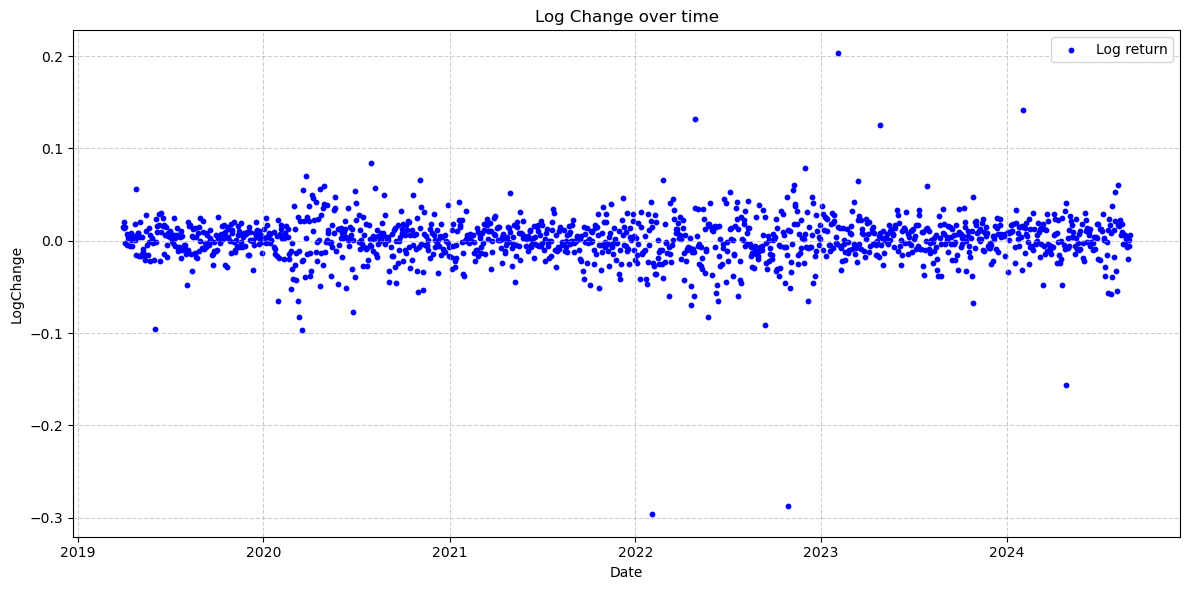

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(
    data_frame["Date"], data_frame["log_return"], label="Log return", color="blue", s=10
)
plt.title("Log Change over time")
plt.xlabel("Date")
plt.ylabel("LogChange")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In [5]:
data_frame

,Date,SMB,HML,RMW,CMA,RF,ADS_Index,SP500,T10Y3M,DGS10,...,SMA50,OBV,Kalman,Open,High,Low,Close,Adj_Close,Volume,log_return
12,2019-04-01,-0.19,0.99,-0.07,-0.32,0.010,-0.480695,2867.19,0.06,2.49,...,163.226400,214652500,168.135562,167.830002,168.899994,167.279999,168.699997,168.193588,10381500,0.011986
13,2019-04-02,-0.18,-0.45,-0.39,-0.50,0.010,-0.497589,2867.24,0.06,2.48,...,163.709600,238599000,172.681393,170.139999,174.899994,169.550003,174.199997,173.677078,23946500,0.032082
14,2019-04-03,0.23,-0.40,0.13,-0.40,0.010,-0.513816,2873.40,0.08,2.52,...,164.228999,211207900,173.324990,174.500000,177.960007,172.949997,173.539993,173.019058,27391100,-0.003796
15,2019-04-04,0.35,0.93,0.64,0.22,0.010,-0.529382,2879.39,0.07,2.51,...,164.863399,229055600,175.345142,176.020004,178.000000,175.529999,176.020004,175.491623,17847700,0.014190
16,2019-04-05,0.49,-0.07,-0.28,0.10,0.010,-0.544293,2892.74,0.06,2.50,...,165.461199,219461500,175.626132,176.880005,177.000000,175.100006,175.720001,175.192520,9594100,-0.001706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1371,2024-08-23,1.90,0.85,-0.48,0.68,0.022,-0.140090,5634.61,-1.44,3.81,...,502.936000,1245186000,529.064247,536.919983,539.869995,525.059998,528.000000,527.496765,11323900,-0.007416
1372,2024-08-26,0.33,0.17,0.13,-0.06,0.022,-0.162837,5616.84,-1.42,3.82,...,503.276400,1235602000,523.109327,527.599976,528.000000,514.950012,521.119995,520.623352,9584000,-0.013116
1373,2024-08-27,-0.90,0.02,0.27,0.23,0.022,-0.172439,5625.80,-1.40,3.83,...,503.575200,1229319300,520.103963,518.979980,524.010010,515.309998,519.099976,518.605225,6282700,-0.003884
1374,2024-08-28,-0.22,1.14,0.55,-0.16,0.022,-0.183081,5592.18,-1.37,3.84,...,503.778200,1220213200,517.612380,517.669983,521.090027,512.450012,516.780029,516.287476,9106100,-0.004479


## Feature importance

## trainig

In [ ]:
# For Ridge Regression
from sklearn.linear_model import Ridge

# For Random Forest
from sklearn.ensemble import RandomForestRegressor

# Ridge Regression model
model = Ridge(alpha=1.0, random_state=42)

# Random Forest model
model = RandomForestRegressor(n_estimators=200, max_depth=3, random_state=42)


# XGBoost model
model = xgb.XGBRegressor(
    learning_rate=0.05, max_depth=3, n_estimators=200, random_state=42
)

## log return as target model

In [35]:
features = [
    "RSI",
    "RF",
    "CMA",
    "HML",
    "Volatility",
    "VIXCLS",
    "RMW",
    "SMB",
    "DHHNGSP",
    "ADS_Index",
    "EMVELECTGOVRN_interp",
]

## TRADING WITH BASIC STRAT

In [19]:
# Assuming the necessary features are defined

target = "log_return"

# Assuming data_frame is already loaded
# data_frame['log_return'] = np.log(data_frame['Close'] / data_frame['Open'])

# Drop rows with missing values
data_frame = data_frame.dropna()

# Split the data into features and target variable
X = data_frame[features]
y = data_frame[target]

# Train-test split
train_size = int(0.90 * len(data_frame))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Initialize and train the XGBoost model
# model = xgb.XGBRegressor(
#     objective='reg:squarederror',
#     n_estimators=1000,         # Increase for better learning
#     learning_rate=0.01,       # Lower learning rate
#     max_depth=50,
#     random_state=42# Moderate tree depth
# )
model.fit(X_train, y_train)

# Trading simulation setup
start_date_index = 252
initial_balance = 50000
balance = {start_date_index: initial_balance}
position = 100
signal = {}
gain_loss = {}

# Trading loop
for today in range(start_date_index, len(data_frame) - 1):
    try:
        # Prepare test data for prediction
        X_test_today = data_frame.iloc[today : today + 1][features]  # Fixed indexing

        # Predict the log return for tomorrow
        y_pred_tomorrow = model.predict(X_test_today)[
            0
        ]  # Added [0] to get scalar value

        # Get actual prices
        actual_open = data_frame["Open"].iloc[today + 1]
        actual_close = data_frame["Close"].iloc[today + 1]

        # Trading logic
        if y_pred_tomorrow > 0:
            signal[today + 1] = 1
            trade_gain_loss = (actual_close - actual_open) * position
        else:
            signal[today + 1] = -1
            trade_gain_loss = (actual_open - actual_close) * position

        # Update balance
        prev_balance = balance[today]  # Use direct indexing
        balance[today + 1] = prev_balance + trade_gain_loss
        gain_loss[today + 1] = trade_gain_loss

    except Exception as e:
        print(f"Error at index {today}: {e}")
        balance[today] = balance[today - 1]

# Create results DataFrame
results = pd.DataFrame(
    {
        "Signal": pd.Series(signal),
        "Gain/Loss": pd.Series(gain_loss),
        "Balance": pd.Series(balance),
    }
)

## TRADING STRAT WITH STOP LOSS

In [ ]:
# Assuming the necessary features are defined

target = "log_return"

# Assuming data_frame is already loaded
# data_frame['log_return'] = np.log(data_frame['Close'] / data_frame['Open'])

# Drop rows with missing values
data_frame = data_frame.dropna()

# Split the data into features and target variable
X = data_frame[features]
y = data_frame[target]

# Train-test split
train_size = int(0.80 * len(data_frame))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Initialize and train the XGBoost model
model.fit(X_train, y_train)

# Trading simulation setup
start_date_index = 252
initial_balance = 50000
balance = {start_date_index: initial_balance}
position = 100
signal = {}
gain_loss = {}

# Define stop-loss, take-profit, and confidence threshold levels
stop_loss = 0.01  # 1% stop-loss
take_profit = 0.05  # 5% take-profit
confidence_threshold = 0.01  # Confidence threshold for making trades
threshold = 0.005  # Prediction threshold for buy/sell signal


# Trading loop
for today in range(start_date_index, len(data_frame) - 1):
    try:
        # Prepare test data for prediction
        X_test_today = data_frame.iloc[today : today + 1][features]

        # Predict the log return for tomorrow
        y_pred_tomorrow = model.predict(X_test_today)[
            0
        ]  # Added [0] to get scalar value

        # Confidence check before trading
        if abs(y_pred_tomorrow) > confidence_threshold:
            if y_pred_tomorrow > threshold:
                signal[today + 1] = 1  # Buy signal
                trade_gain_loss = (
                    data_frame["Close"].iloc[today + 1]
                    - data_frame["Open"].iloc[today + 1]
                ) * position

                # Implement stop-loss and take-profit check
                if (
                    data_frame["Close"].iloc[today + 1]
                    - data_frame["Open"].iloc[today + 1]
                ) / data_frame["Open"].iloc[today + 1] < -stop_loss:
                    trade_gain_loss = -stop_loss * position  # Stop-loss triggered
                elif (
                    data_frame["Close"].iloc[today + 1]
                    - data_frame["Open"].iloc[today + 1]
                ) / data_frame["Open"].iloc[today + 1] > take_profit:
                    trade_gain_loss = take_profit * position  # Take-profit triggered

            elif y_pred_tomorrow < -threshold:
                signal[today + 1] = -1  # Sell signal
                trade_gain_loss = (
                    data_frame["Open"].iloc[today + 1]
                    - data_frame["Close"].iloc[today + 1]
                ) * position

        # Update balance (only if no error occurs)
        prev_balance = balance[today]  # Use direct indexing
        balance[today + 1] = prev_balance + trade_gain_loss
        gain_loss[today + 1] = trade_gain_loss

    except Exception as e:
        print(f"Error at index {today}: {e}")
        # Ensure balance remains the same if an error occurs
        if today in balance:
            balance[today + 1] = balance[today]

# Create results DataFrame
results = pd.DataFrame(
    {
        "Signal": pd.Series(signal),
        "Gain/Loss": pd.Series(gain_loss),
        "Balance": pd.Series(balance),
    }
)


In [23]:
from sklearn.metrics import mean_absolute_error, r2_score

print("MAE:", mean_absolute_error(y_test, model.predict(X_test)))
print("R² Score:", r2_score(y_test, model.predict(X_test)))

# Display all unique values in the 'Signal' column
unique_signals = results["Signal"].unique()
print("\nUnique Signals:", unique_signals)

# Display the frequency of each unique value
signal_counts = results["Signal"].value_counts()
print("Signal Counts:", signal_counts)


MAE: 0.013814581545241322
R² Score: 0.1884516224529933

Unique Signals: [nan  1. -1.]
Signal Counts: Signal
 1.0    249
-1.0    178
Name: count, dtype: int64


In [11]:
print(y_pred_tomorrow)

0.011525379


## Plot code

Strategy Total Return: $97,283.47
Buy & Hold Total Return: $105,045.75
Strategy Return Percentage: 194.57%
Buy & Hold Return Percentage: 210.09%


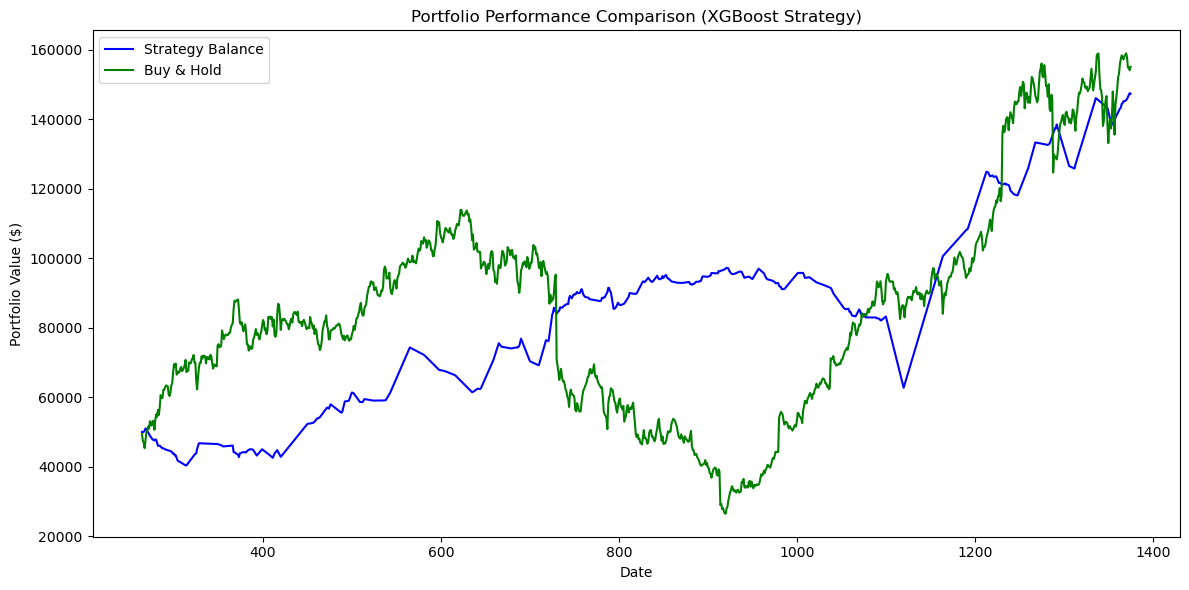

In [45]:
# Add the Date column using the stock index
results["Date"] = data_frame.index[results.index]
results.set_index("Date", inplace=True)

# --- Calculate Buy and Hold Strategy ---
initial_purchase_price = data_frame["Open"].iloc[start_date_index]
shares_purchased = initial_balance / initial_purchase_price

# Buy & Hold value over time
results["Buy_Hold"] = (
    initial_balance
    + (data_frame["Close"].loc[results.index] - initial_purchase_price)
    * shares_purchased
)

# --- Calculate Performance Metrics ---
results["Cumulative_Return"] = (
    (results["Balance"] - initial_balance) / initial_balance * 100
)
results["Buy_Hold_Return"] = (
    (results["Buy_Hold"] - initial_balance) / initial_balance * 100
)

# --- Performance Comparison ---
strategy_total_return = results["Balance"].iloc[-1] - initial_balance
buy_hold_return = results["Buy_Hold"].iloc[-1] - initial_balance

print(f"Strategy Total Return: ${strategy_total_return:,.2f}")
print(f"Buy & Hold Total Return: ${buy_hold_return:,.2f}")
print(
    f"Strategy Return Percentage: {strategy_total_return / initial_balance * 100:.2f}%"
)
print(f"Buy & Hold Return Percentage: {buy_hold_return / initial_balance * 100:.2f}%")

# --- Visualize Performance ---
plt.figure(figsize=(12, 6))
plt.plot(results.index, results["Balance"], label="Strategy Balance", color="b")
plt.plot(results.index, results["Buy_Hold"], label="Buy & Hold", color="g")
plt.title("Portfolio Performance Comparison (XGBoost Strategy)")
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.legend()
plt.tight_layout()
plt.show()
